# Ford GoBike System Data Analysis and Visualizations
## by Bilal Almajnooni

## Investigation Overview

In this investigation, we will look at trends of trips, duration of trips, and as well as tendency of bikers on days of the week.

## Dataset Overview

This dataset includes bike rides data of 183,412 observations, and after cleaning it we were left with 168,639 observations. Its data members include:
- Trip time: which includes duration secs and mins, start time and end time, start hour and start day.
- Station info: which includes id, name, latitude, and longitude for both start and end stations.
- Bike info: which includes id.
- User info: which includes type(customer, subscriber), birth year, gender, age, and whether the user took the bike for the whole trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_master.csv')

In [3]:
def plot_description(title, x, y, size=15):
    plt.title(title,size=size);
    plt.xlabel(x,size=size);
    plt.ylabel(y,size=size);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             168639 non-null  int64  
 1   start_time               168639 non-null  object 
 2   end_time                 168639 non-null  object 
 3   start_station_id         168639 non-null  int64  
 4   start_station_name       168639 non-null  object 
 5   start_station_latitude   168639 non-null  float64
 6   start_station_longitude  168639 non-null  float64
 7   end_station_id           168639 non-null  int64  
 8   end_station_name         168639 non-null  object 
 9   end_station_latitude     168639 non-null  float64
 10  end_station_longitude    168639 non-null  float64
 11  bike_id                  168639 non-null  int64  
 12  user_type                168639 non-null  object 
 13  member_birth_year        168639 non-null  int64  
 14  memb

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Length For Bikers

Bikers tend to take short trips that ranges from 4 to 16 with an average of 10 minutes. The following graph x-axis is scaled to log

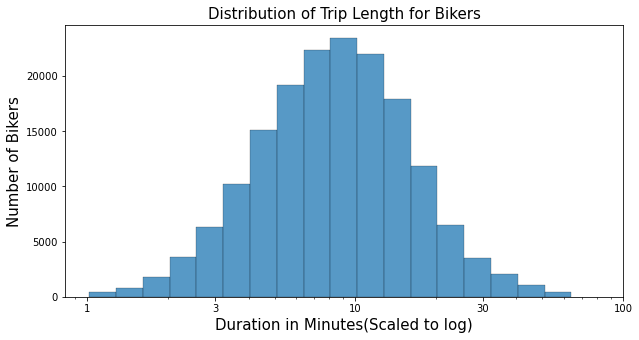

In [5]:
plt.figure(figsize=(10,5));
bins = 10 ** np.arange(np.log10(df.duration_mins.min()), np.log10(df.duration_mins.max())+0.1, 0.1)
ticks =  [1, 3, 10, 30, 100]
labels = ['{}'.format(x) for x in ticks]
sb.histplot(df.duration_mins,bins = bins);
plot_description('Distribution of Trip Length for Bikers','Duration in Minutes(Scaled to log)','Number of Bikers')
plt.xscale('log')
plt.xticks(ticks, labels);

## Trip Length Per User Type

Only 90.7% of users are subscribers, and customers amount to 9.3% of the users. On average, customers tend to take longer trips than subscribers by 5 minutes.

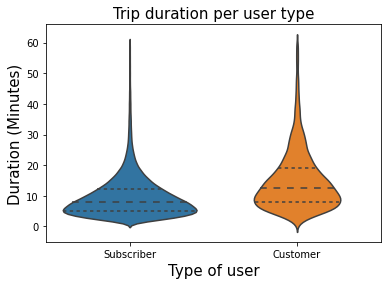

In [6]:
sb.violinplot(data=df,x='user_type',y='duration_mins',inner='quartiles');
plot_description('Trip duration per user type','Type of user','Duration (Minutes)')

## Tendency of bikes to take same route of trip

There some occasions in which bikes that are used by users tend to take the same trip from start station to end station more than once and up to 7 times.

In [7]:
df_trips = df.groupby(['bike_id','start_station_id','end_station_id']).bike_id.count()

df_trips = df_trips.reset_index(name='trips')

df_trips

,bike_id,start_station_id,end_station_id,trips
0,11,3,54,1
1,11,15,93,1
2,11,17,90,1
3,11,19,112,1
4,11,22,86,1
...,...,...,...,...
164782,6644,381,100,1
164783,6645,238,241,1
164784,6645,241,385,1
164785,6645,245,256,1


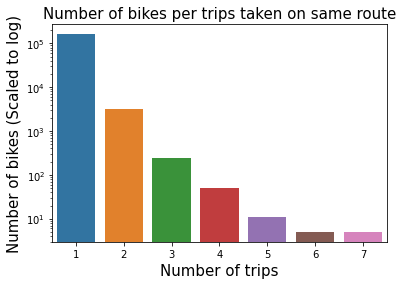

In [8]:
sb.countplot(data=df_trips, x='trips')
plot_description('Number of bikes per trips taken on same route','Number of trips','Number of bikes (Scaled to log)')
plt.yscale('log');

## Peak trip duration and age for bikers on each day of the week

On weekdays, users in their mid 30's tend use the bikes the most with an average duration of 7.5 minutes. However, during the weekends, users in their early 30's are more noticable in using the bikes to take a trip that lasts less than 7.5 minutes on average.

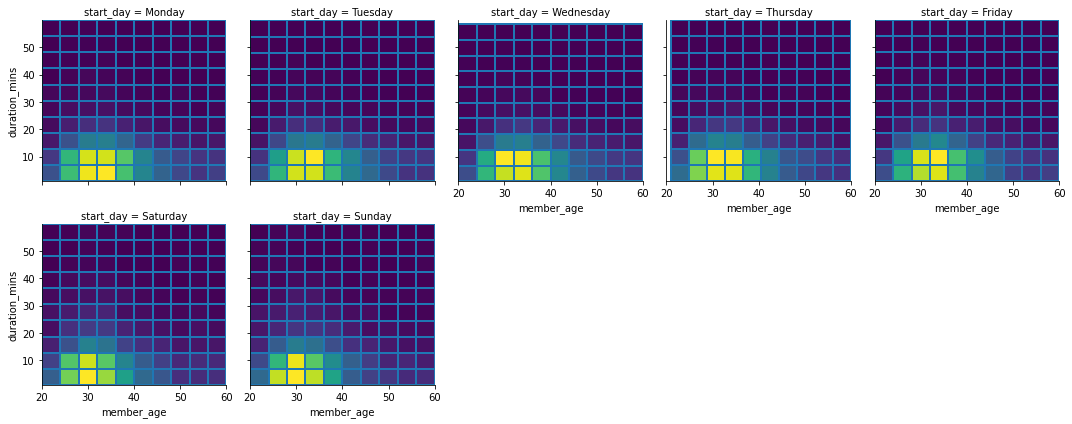

In [9]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

g = sb.FacetGrid(data = df, col = 'start_day', col_wrap = 5, col_order=days, height = 3);
g.map(plt.hist2d, 'member_age', 'duration_mins');

In [11]:
!jupyter nbconvert slide_deck_FordGo.ipynb --to slides --post serve --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_FordGo.ipynb to slides
[NbConvertApp] Writing 664935 bytes to slide_deck_FordGo.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Bilal\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Bilal\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Bilal\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Bilal\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Bilal\anaconda3\lib\site-packages\nbconvert\nbconverta